In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

def residue(A, v, lam):
    return np.linalg.norm(A.dot(v) - lam * v)

def info_store(lam, vec, A):
    global info_dict
    info_dict['lam'].append(lam)
    info_dict['vec'].append(vec)
    info_dict['residue'].append(residue(A, vec, lam))

def visualize(info_dict):
    N = len(info_dict['lam'])
    x = [i for i in range(N)]
    plt.plot(x, info_dict['residue'])
    plt.xlabel('iteration')
    plt.ylabel('residue')
    plt.title('Convergence rate')
    plt.show()

def print_log(idx, info_dict):
    info_list = [[i, info_dict['vec'][i], info_dict['lam'][i], info_dict['residue'][i]] for i in range(idx)]
    print(tabulate(info_list, headers=["iteration","eigenvector", "eigenvalue","residue"]))


# Rayleigh Quotient Iteration Method
Rayleight Quotient Iteration is a variant of Shifted Inverse Iteration Method.
Instead of choosing a specific $\mu$ close to a known eigenvalue, it calculates
the Rayleigh Quotient for the vector we are processing. In another word, RQ Iteration
uses dynamic $\mu$ following Rayleigh Quotient.

  iteration  eigenvector                eigenvalue      residue
-----------  -----------------------  ------------  -----------
          0  [0.8 0.6]                     2.26     0.18
          1  [0.76288455 0.64653474]       2.27069  0.000637182
          2  [0.76301998 0.6463749 ]       2.27069  2.79675e-11


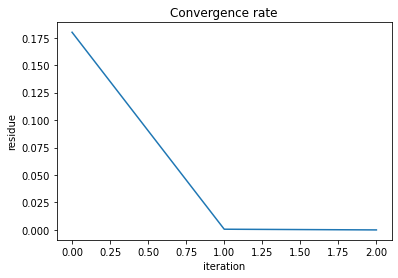

In [52]:
def RayleighQuotientIteration(A, convergence_condition=0.00001):
    idx = 0
    r, c = A.shape
   # initialize eigenvectors
    v = np.zeros(r)
    v.fill(1/math.sqrt(r))
    # initialize eigenvalues
    lam = 1
    while True:
        idx = idx + 1
        IA = A - lam * np.identity(r)
        v_new = np.linalg.solve(IA, v)
        v_new = v_new / np.linalg.norm(v_new)
        lam_new = v_new.dot(A.dot(v_new))
        info_store(lam_new, v_new, A)
        if np.abs(lam_new - lam) < convergence_condition:
            break
        lam = lam_new
        v = v_new
    return v_new, lam_new, idx

if __name__ == '__main__':

    info_dict = {}
    info_dict['lam'] = []
    info_dict['vec'] = []
    info_dict['residue'] = []
    A = np.array([[1, 1.5],[1.5, 0.5]])
    _, _, idx = RayleighQuotientIteration(A)
    print_log(idx,info_dict)
    visualize(info_dict)